In [88]:
from scipy.spatial.distance import mahalanobis
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

In [89]:
cov_1 = np.array([
    [1, 0.5], 
    [0.5, 1]
])
mean_1 = np.array([0, 0])
population_1 = np.random.multivariate_normal(mean_1, cov_1, 500)

In [90]:
cov_2 = np.array([
    [1, -0.5], 
    [-0.5, 1]
])
mean_2 = np.array([0.3, 0.3])
population_2 = np.random.multivariate_normal(mean_2, cov_2, 500)

In [91]:
def add_ellipse(ax, cov, population, std=1, color='black'):
    # TAKEN FROM THE DOCUMENTATION: https://matplotlib.org/stable/gallery/statistics/confidence_ellipse.html
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensional dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2, facecolor='none', edgecolor=color)

    scale_x = np.sqrt(cov[0, 0]) * std
    mean_x = np.mean(population[:, 0])

    # calculating the standard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * std
    mean_y = np.mean(population[:, 1])

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    ax.add_patch(ellipse)

Text(0, 0.5, 'V')

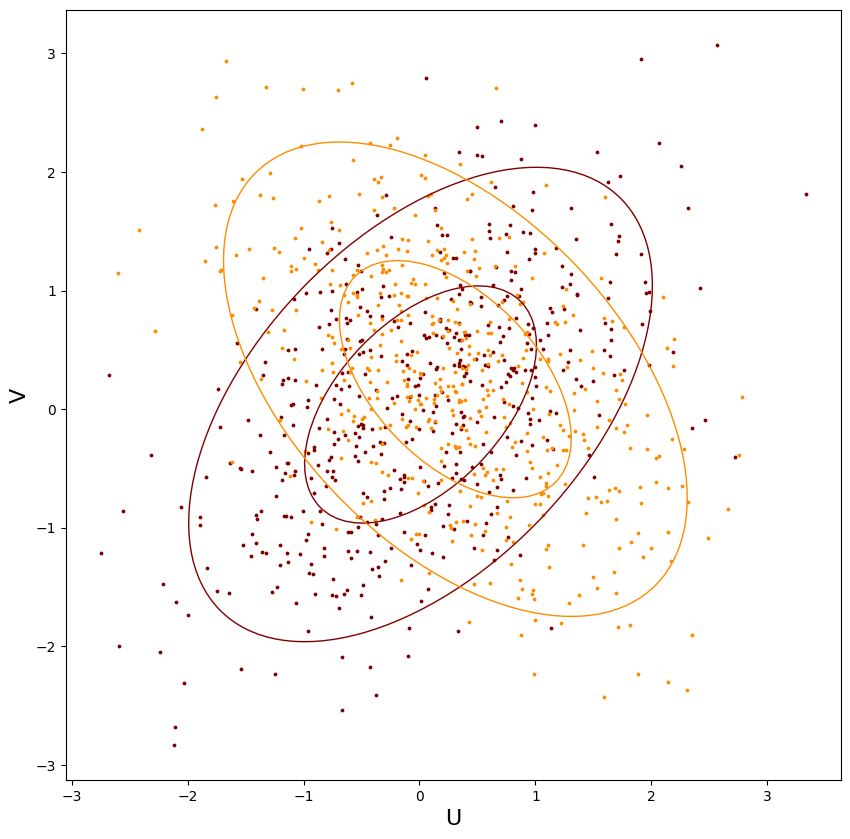

In [92]:

# create a figure
fig, ax = plt.subplots(figsize=(10, 10))

ax.scatter(population_1[:, 0], population_1[:, 1], label='Population 1', s=3, color='maroon')
ax.scatter(population_2[:, 0], population_2[:, 1], label='Population 2', s=3, color='darkorange')

add_ellipse(ax, cov_1, population_1, std=1, color='maroon')
add_ellipse(ax, cov_2, population_2, std=1, color='darkorange')
add_ellipse(ax, cov_1, population_1, std=2, color='maroon')
add_ellipse(ax, cov_2, population_2, std=2, color='darkorange')

# add labels
ax.set_xlabel('U', fontsize=16)
ax.set_ylabel('V', fontsize=16)

In [96]:
# compute the mahalanobis distance of the mean of the two populations
mah = mahalanobis(mean_2, mean_1, np.linalg.inv(cov_1))
mah

0.3464101615137754

In [98]:
mah = mahalanobis(mean_1, mean_2, np.linalg.inv(cov_2))
mah

0.6